In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data_tmp/bakery_sales.csv")
df_bakery = pd.read_csv("data_tmp/bakery_sales_reduit.csv")
df_ticket = pd.read_csv("data_tmp/bakery_tickets.csv")

In [29]:
df_ticket

,ticket_number,total_spent,total_quantity_articles,year,month,day,hour,minute,dayofweek,is_weekend
datetime,,,,,,,,,,
2021-01-02 08:38:00,150040,4.50,4.0,2021,1,2,8,38,5,1
2021-01-02 09:14:00,150041,3.55,3.0,2021,1,2,9,14,5,1
2021-01-02 09:25:00,150042,6.00,5.0,2021,1,2,9,25,5,1
2021-01-02 09:25:00,150043,5.10,5.0,2021,1,2,9,25,5,1
2021-01-02 09:27:00,150044,1.05,1.0,2021,1,2,9,27,5,1
...,...,...,...,...,...,...,...,...,...,...
2022-09-30 18:34:00,288908,2.70,2.0,2022,9,30,18,34,4,0
2022-09-30 18:39:00,288910,1.30,1.0,2022,9,30,18,39,4,0
2022-09-30 18:52:00,288911,12.15,11.0,2022,9,30,18,52,4,0


Aperçu de la série temporelle :
datetime
2021-01-02    5.341576
2021-01-03    4.631507
2021-01-04    3.198601
2021-01-05    3.438000
2021-01-06         NaN
Freq: D, Name: total_spent, dtype: float64


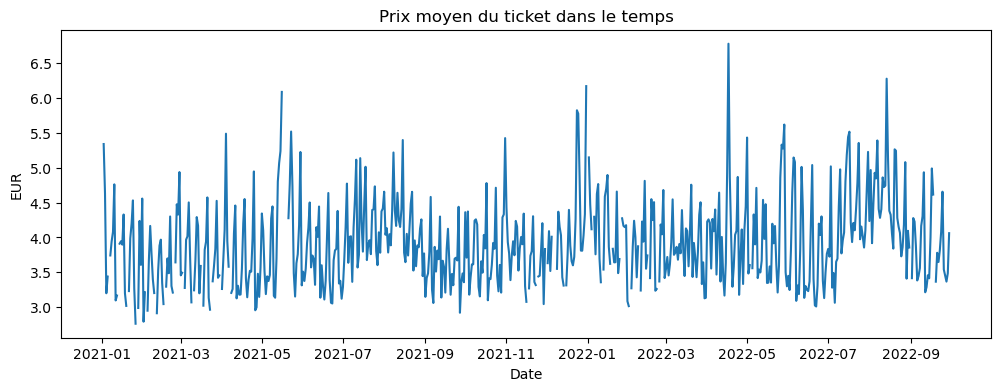


=== Test ADF (stationnarité) ===
ADF statistic : -4.2908
P-value       : 0.0005
✅ La série semble stationnaire.


ValueError: This function does not handle missing values

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# 1) Créer l'index datetime et trier
df_ticket['datetime'] = pd.to_datetime(df_ticket['year'].astype(str) + '-' + 
                                     df_ticket['month'].astype(str) + '-' + 
                                     df_ticket['day'].astype(str) + ' ' + 
                                     df_ticket['hour'].astype(str) + ':' + 
                                     df_ticket['minute'].astype(str))
df_ticket = df_ticket.set_index("datetime").sort_index()

# 2) Résampler pour obtenir une série temporelle régulière
#    (au choix : 'D' = par jour, 'H' = par heure)
ts = df_ticket["total_spent"].resample("D").mean()

print("Aperçu de la série temporelle :")
print(ts.head())

# 3) Visualisation simple de l'évolution du prix moyen du ticket
plt.figure(figsize=(12,4))
plt.plot(ts)
plt.title("Prix moyen du ticket dans le temps")
plt.ylabel("EUR")
plt.xlabel("Date")
plt.show()

# 4) Test de stationnarité ADF
result = adfuller(ts.dropna())
print("\n=== Test ADF (stationnarité) ===")
print(f"ADF statistic : {result[0]:.4f}")
print(f"P-value       : {result[1]:.4f}")
if result[1] <= 0.05:
    print("✅ La série semble stationnaire.")
else:
    print("❗ La série n'est pas stationnaire → pensez à la différencer.")

# 5) Décomposition tendance + saisonnalité + résidus
decomp = seasonal_decompose(ts, model="additive", period=7)  # période hebdo = 7 jours
fig = decomp.plot()
fig.set_size_inches(12, 8)
plt.show()

